In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.cluster import KMeans



In [2]:
mall = pd.read_csv('Mall_Customers.csv')


DISCOVERY DATA

In [3]:
mall.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
mall.shape

(200, 5)

In [5]:
mall.size

1000

In [6]:
mall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


CLEAN DATA

In [7]:
#check for null value
mall.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [8]:
#check for duplicate value
mall.duplicated().sum()

0

In [9]:
#remove leading or trailing whitespace in column
mall.column = mall.columns.str.strip()

C:\Users\sarin\AppData\Local\Temp\ipykernel_14292\3350701656.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  mall.column = mall.columns.str.strip()


In [10]:
#convert CustomerID from int to object
mall['CustomerID'] = mall['CustomerID'].astype(str)

CHECK DATA AFTER CLEAN

In [11]:
mall.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [12]:
mall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    object
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 7.9+ KB


ANALYSIS

In [13]:
#descriptive state
mall.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.0,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.0,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.0,99.0


c:\Users\sarin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\sarin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\sarin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


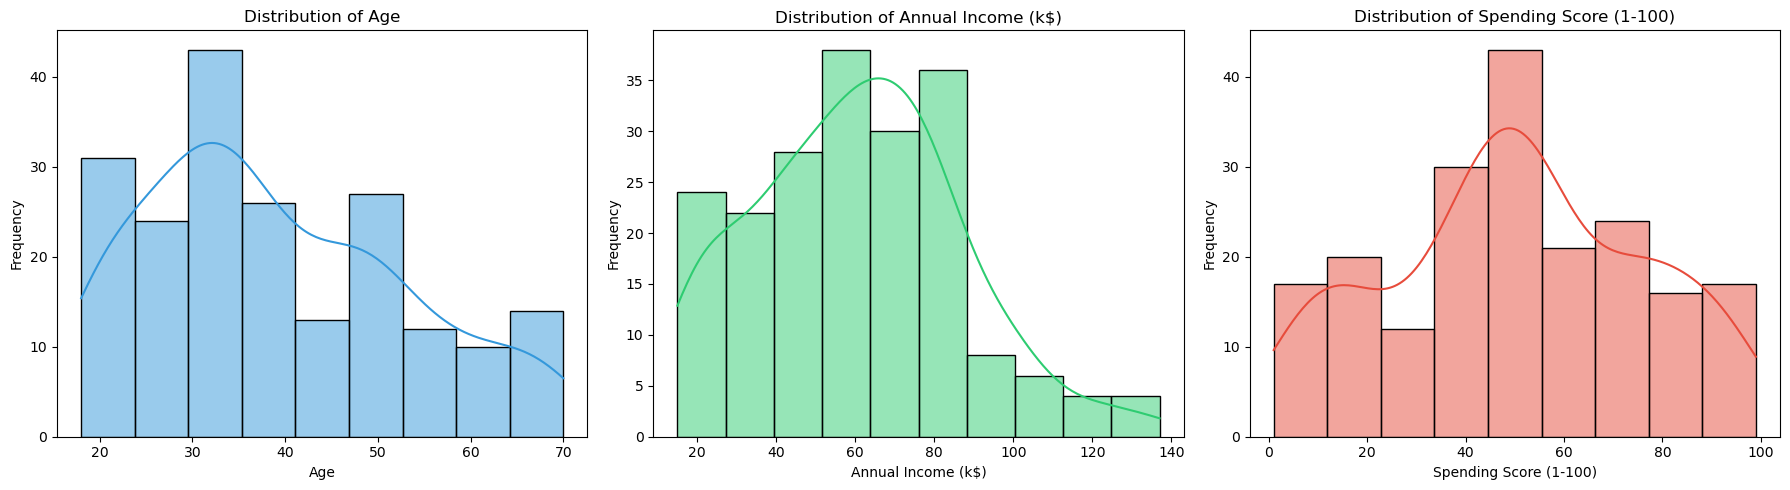

In [14]:
#display distribution of Age, Annual Income and Spendinf Score
columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
colors = ['#3498db', '#2ecc71', '#e74c3c']


for i, col in enumerate(columns):
    sns.histplot(data=mall, x=col, kde=True, color=colors[i], ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()  
plt.show()

c:\Users\sarin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\sarin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\sarin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


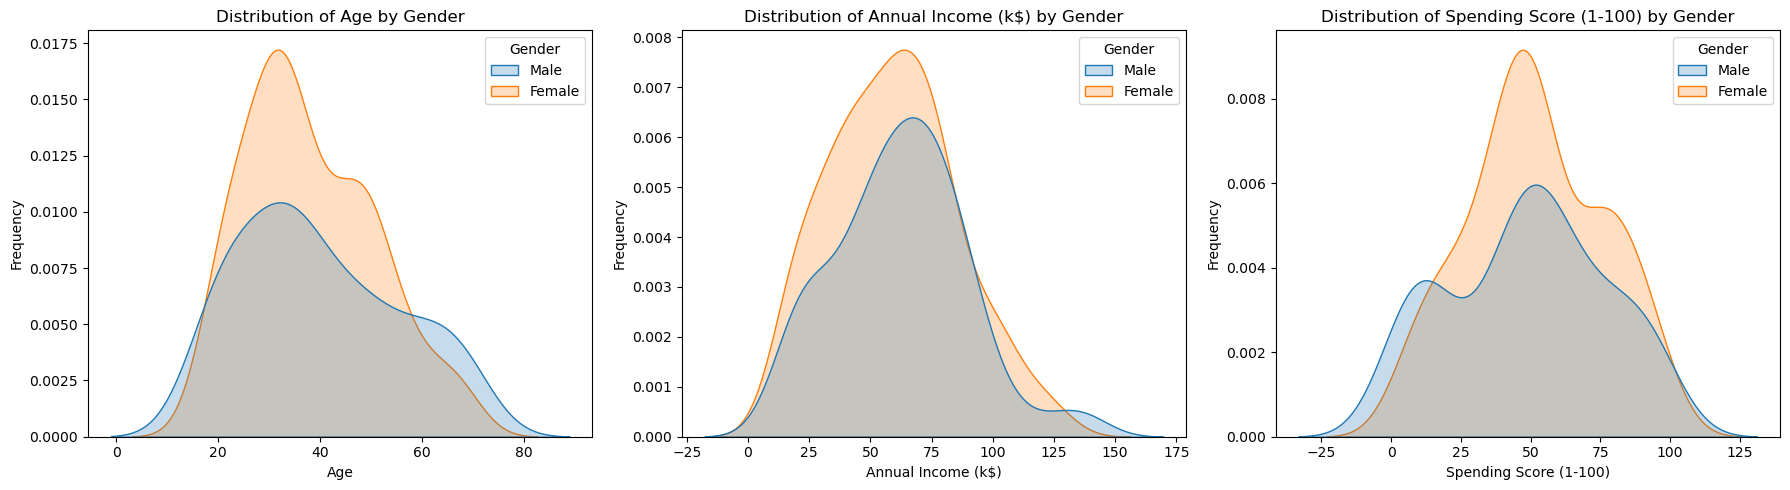

In [15]:
#check the distribution of all variables by gender
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, col in enumerate(columns):
    sns.kdeplot(data=mall, x=col, ax=axes[i], hue= 'Gender', fill=True)
    axes[i].set_title(f'Distribution of {col} by Gender')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()  
plt.show()

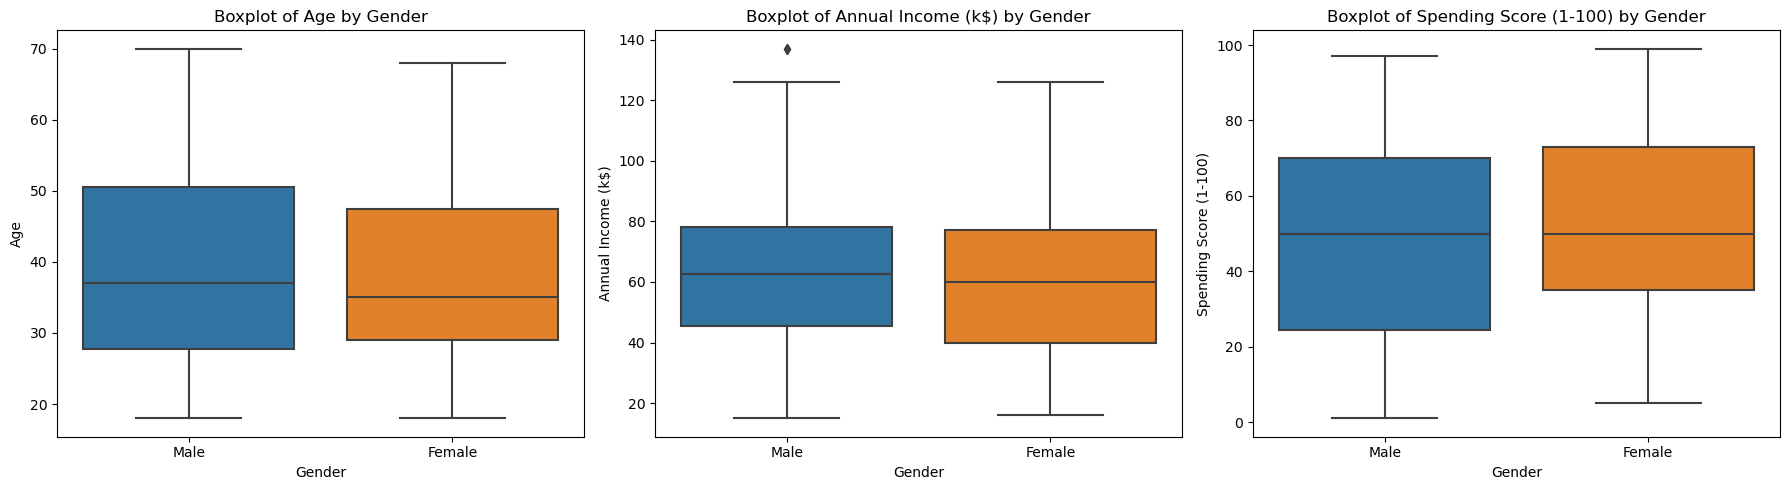

In [16]:
#check the outliner by boxplot
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, col in enumerate(columns):
    sns.boxplot(data=mall, x='Gender', y=col, ax=axes[i])
    axes[i].set_title(f'Boxplot of {col} by Gender')
    axes[i].set_xlabel('Gender')
    axes[i].set_ylabel(col)


plt.tight_layout()  
plt.show()

In [17]:
#check the portion of each gender
mall['Gender'].value_counts(normalize=True)

Gender
Female    0.56
Male      0.44
Name: proportion, dtype: float64

c:\Users\sarin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\sarin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\sarin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


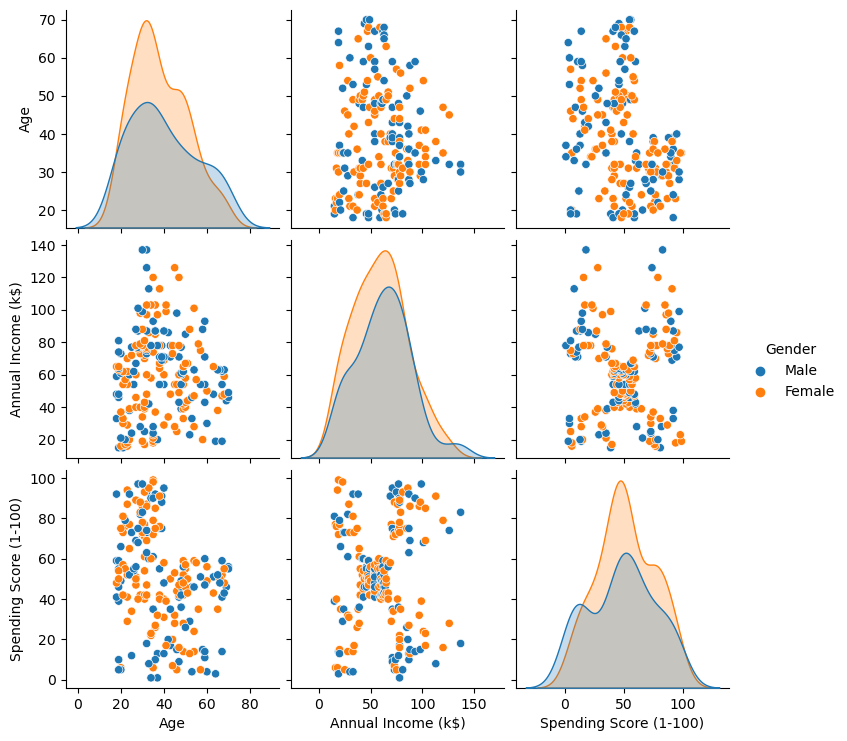

In [18]:
#check relationship between variable
##pair plot
sns.pairplot(mall, hue= 'Gender')

In [19]:
#check to see the mean of each variable
mall.groupby(['Gender'])[['Age', 'Annual Income (k$)','Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [20]:
##correlation
correlation = mall[['Age' , 'Annual Income (k$)', 'Spending Score (1-100)' ]].corr()
correlation

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


In [21]:
fig = px.imshow(correlation, text_auto=True, color_continuous_scale= 'Oranges')

# Show the plot
fig.update_layout(
    title={
        'text': 'Correlation Between Variables',
        'font_size': 16,
        'x': 0.5,  # Center the title
        'xanchor': 'center'  # Align the title horizontally
    }, 
    width=1200,  # Increase the width
    height=600  # Increase the height   
)
fig.update_traces(
    textfont_size=12  # Modify the font size of the text labels
)

fig.show()

K-MEAN CLUSTERING

Univariable Clustering

1.Initiata K-Mean algorithm

In [22]:
#1.1.perform clustering on dataset using 'Annual Income'
clustering1 = KMeans()  
clustering1.fit(mall[['Annual Income (k$)']]) 
KMeans() 
clustering1.labels_ 

c:\Users\sarin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\sarin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 6, 6, 6, 6,
       6, 6])

In [23]:
#1.2.add column of cluster to the OG table
mall['Income Cluster'] = clustering1.labels_
mall.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
0,1,Male,19,15,39,1
1,2,Male,21,15,81,1
2,3,Female,20,16,6,1
3,4,Female,23,16,77,1
4,5,Female,31,17,40,1


In [24]:
#1.3.check data point of each cluster
mall['Income Cluster'].value_counts()

Income Cluster
0    42
2    36
4    36
5    26
1    24
7    16
3    14
6     6
Name: count, dtype: int64

In [25]:
#1.4.find the clustering inertia (distance between centroid)
clustering1.inertia_

2857.441697191697

In [26]:
#1.5.check inertia of each cluster
WCSS = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init = 'k-means++', random_state=42)
    kmeans.fit(mall[['Annual Income (k$)']])
    WCSS.append(kmeans.inertia_)
WCSS

c:\Users\sarin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\sarin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\Users\sarin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\sarin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\Users\sar

[137277.28000000003,
 48660.88888888889,
 23517.330930930926,
 13278.112713472487,
 8481.496190476191,
 5081.484660267269,
 3936.7968253968256,
 2857.441697191697,
 2176.280952380953,
 1761.8055555555557]

Text(0, 0.5, 'WCSS')

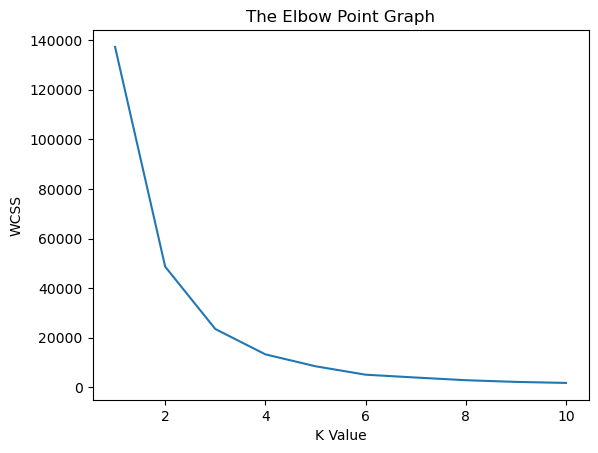

In [27]:
#1.5. Plot Elbow Chart : WCSS against cluster -->to find optimal K to find optimal k
plt.plot(range(1,11), WCSS)
plt.title('The Elbow Point Graph')
plt.xlabel('K Value')
plt.ylabel('WCSS')

2.Fit K-Mean Model (1 variable) by using optimal k from Elbow Chart which is 3

In [28]:
#2.1.run k-mean algorithm by using cluster = 3 *get from Elbow Chart*
clustering2 = KMeans(n_clusters=3)  
clustering2.fit(mall[['Annual Income (k$)']]) 
KMeans() 
clustering2.labels_ 

c:\Users\sarin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\sarin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [29]:
#2.2.add 'Income Cluster' column to table
mall['Income Cluster'] = clustering2.labels_
mall.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
0,1,Male,19,15,39,0
1,2,Male,21,15,81,0
2,3,Female,20,16,6,0
3,4,Female,23,16,77,0
4,5,Female,31,17,40,0


In [30]:
#2.3.check the data point of each cluster
mall['Income Cluster'].value_counts()

Income Cluster
1    90
0    74
2    36
Name: count, dtype: int64

In [31]:
#2.4.check the inertia
clustering2.inertia_

23517.330930930926

In [32]:
#2.5.check inertia of each cluster
WCSS2 = []

for i in range(1, 11):
    kmeans2 = KMeans(n_clusters=i, init = 'k-means++', random_state=42)
    kmeans2.fit(mall[['Annual Income (k$)']])
    WCSS2.append(kmeans2.inertia_)
WCSS2

c:\Users\sarin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\sarin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\Users\sarin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\sarin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\Users\sar

[137277.28000000003,
 48660.88888888889,
 23517.330930930926,
 13278.112713472487,
 8481.496190476191,
 5081.484660267269,
 3936.7968253968256,
 2857.441697191697,
 2176.280952380953,
 1761.8055555555557]

Text(0, 0.5, 'WCSS')

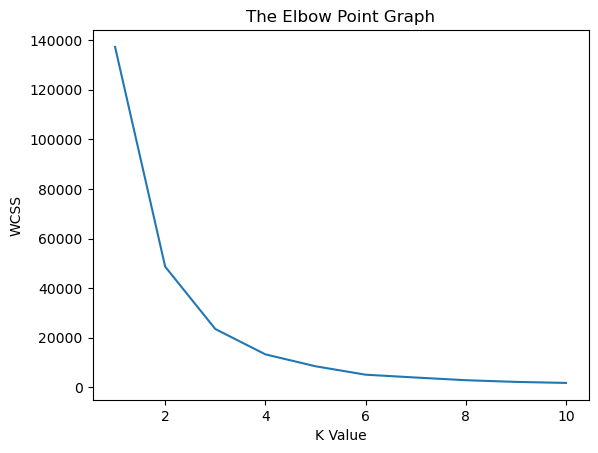

In [33]:
#2.6.plot Elbow chart
plt.plot(range(1,11), WCSS2)
plt.title('The Elbow Point Graph')
plt.xlabel('K Value')
plt.ylabel('WCSS')

In [34]:
avg = mall.groupby('Income Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()
avg

,Age,Annual Income (k$),Spending Score (1-100)
Income Cluster,,,
0,39.500000,33.486486,50.229730
1,38.722222,67.088889,50.000000
2,37.833333,99.888889,50.638889


Bivariable Clustering

1.Initiata K-Mean algorithm (2 variable)

In [35]:
#1.1.perform clustering on dataset using 2 variable
clustering3 = KMeans()
clustering3.fit(mall[['Annual Income (k$)', 'Spending Score (1-100)']])
clustering3.labels_


c:\Users\sarin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\sarin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



array([0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5,
       0, 5, 0, 5, 0, 4, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 4, 5, 4, 4,
       0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 2, 4, 2, 4, 4, 2, 2, 4, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 3, 1, 2, 1, 3, 1, 3, 1,
       2, 1, 3, 1, 3, 1, 3, 1, 3, 1, 2, 1, 3, 1, 2, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 2, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 7, 6, 7, 6, 7, 6, 7, 6, 7, 6, 7, 6, 7, 6, 7, 6, 7, 6,
       7, 6])

In [36]:
#1.2.add 'Spending Score and Income clustering' column to table
mall['Spending Score and Income cluster'] = clustering3.labels_
mall.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending Score and Income cluster
0,1,Male,19,15,39,0,0
1,2,Male,21,15,81,0,5
2,3,Female,20,16,6,0,0
3,4,Female,23,16,77,0,5
4,5,Female,31,17,40,0,0


In [37]:
#1.3.check data point within each cluster *8 cluster*
mall['Spending Score and Income cluster'].value_counts()

Spending Score and Income cluster
2    48
4    39
1    29
3    23
0    21
5    20
7    10
6    10
Name: count, dtype: int64

In [38]:
#1.4.find inertia
clustering3.inertia_

25029.25342493588

In [39]:
#1.5.calculate innertia of each cluster
WCSS3 = []

for i in range(1, 11):
    kmeans3 = KMeans(n_clusters=i, init= 'k-means++', random_state=42)
    kmeans3.fit(mall[['Annual Income (k$)', 'Spending Score (1-100)']])
    WCSS3.append(kmeans3.inertia_)
WCSS3

c:\Users\sarin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\sarin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\Users\sarin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\sarin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\Users\sar

[269981.28,
 181363.59595959596,
 106348.37306211119,
 73679.78903948834,
 44448.45544793371,
 37233.81451071001,
 30259.65720728547,
 25011.839349156595,
 21862.09267218289,
 19672.07284901432]

Text(0, 0.5, 'WCSS')

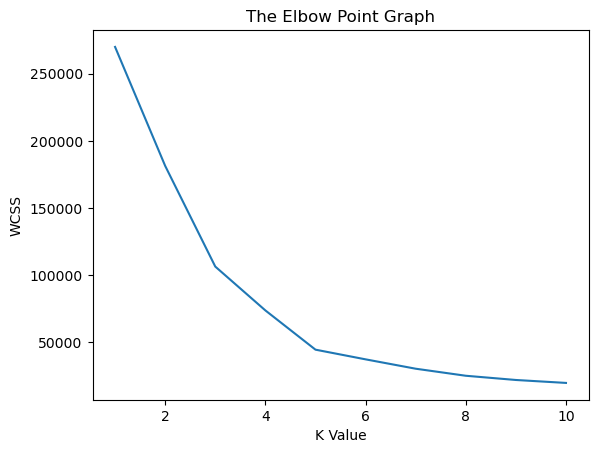

In [40]:
#1.6.plot Elbow chart
plt.plot(range(1,11), WCSS3)
plt.title('The Elbow Point Graph')
plt.xlabel('K Value')
plt.ylabel('WCSS')

2.Fit K-Mean Model (2 variable) by using optimal k from Elbow Chart which is 5

In [41]:
clustering4 = KMeans(n_clusters=5)
clustering4.fit(mall[['Annual Income (k$)', 'Spending Score (1-100)']])
clustering4.labels_

c:\Users\sarin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\sarin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



array([2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 1,
       2, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 0, 3, 1, 3, 0, 3, 0, 3,
       1, 3, 0, 3, 0, 3, 0, 3, 0, 3, 1, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3])

In [42]:
mall['Income + Spending Score Cluster'] = clustering4.labels_
mall.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending Score and Income cluster,Income + Spending Score Cluster
0,1,Male,19,15,39,0,0,2
1,2,Male,21,15,81,0,5,4
2,3,Female,20,16,6,0,0,2
3,4,Female,23,16,77,0,5,4
4,5,Female,31,17,40,0,0,2


In [43]:
mall['Income + Spending Score Cluster'].value_counts()

Income + Spending Score Cluster
1    81
3    39
0    35
2    23
4    22
Name: count, dtype: int64

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

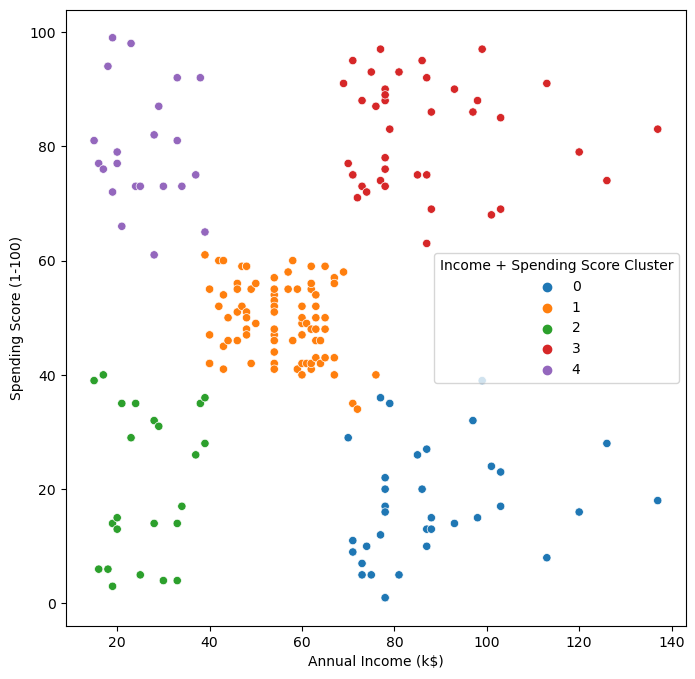

In [57]:
plt.figure(figsize=(8,8))
sns.scatterplot(data=mall, x= 'Annual Income (k$)' , y = 'Spending Score (1-100)', hue= 'Income + Spending Score Cluster' , palette= 'tab10')

In [58]:
#add centroid of each cluster 
centers = pd.DataFrame(clustering4.cluster_centers_)
centers.columns = ['X' , 'Y']
centers

,X,Y
0,88.200000,17.114286
1,55.296296,49.518519
2,26.304348,20.913043
3,86.538462,82.128205
4,25.727273,79.363636


<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

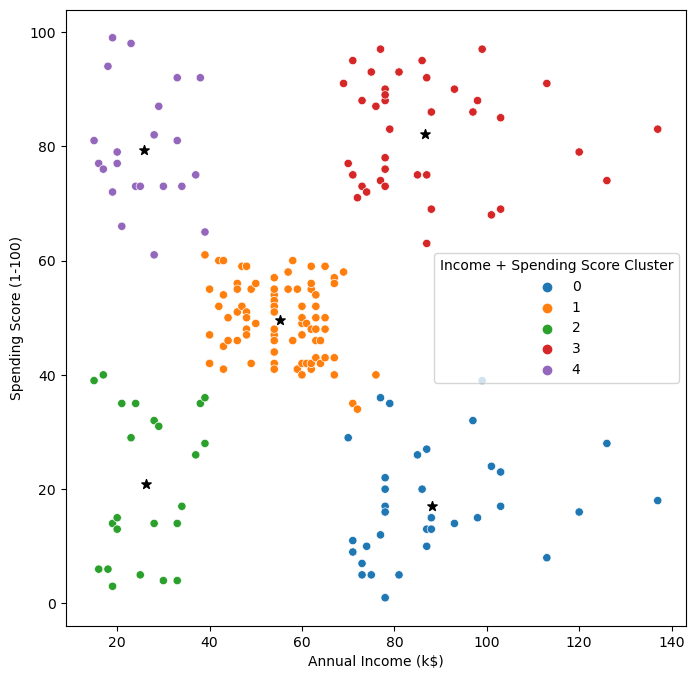

In [56]:
#plot scatter chart with centroid
plt.figure(figsize=(8,8))
plt.scatter(x = centers['X'], y = centers ['Y'] , s = 50 , c = 'black', marker= '*')
sns.scatterplot(data=mall, x= 'Annual Income (k$)' , y = 'Spending Score (1-100)', hue= 'Income + Spending Score Cluster' , palette= 'tab10')

In [50]:
pd.crosstab(mall['Income + Spending Score Cluster'], mall['Gender'], normalize= 'index')

Gender,Female,Male
Income + Spending Score Cluster,,
0,0.457143,0.542857
1,0.592593,0.407407
2,0.608696,0.391304
3,0.538462,0.461538
4,0.590909,0.409091


In [51]:
avg2 = mall.groupby('Income + Spending Score Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()
avg2

,Age,Annual Income (k$),Spending Score (1-100)
Income + Spending Score Cluster,,,
0,41.114286,88.200000,17.114286
1,42.716049,55.296296,49.518519
2,45.217391,26.304348,20.913043
3,32.692308,86.538462,82.128205
4,25.272727,25.727273,79.363636
